<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Clustering" data-toc-modified-id="Clustering-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Clustering</a></span></li></ul></li></ul></div>

In [1]:
#msmbuilder imports 
from msmbuilder.dataset import dataset
from msmbuilder.featurizer import ContactFeaturizer
from msmbuilder.featurizer import DihedralFeaturizer
from msmbuilder.decomposition import tICA
from msmbuilder.cluster import MiniBatchKMeans
from msmbuilder.msm import ContinuousTimeMSM
from msmbuilder.utils import verbosedump,verboseload
from msmbuilder.cluster import KCenters
from msmbuilder.utils import load,dump

/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [6]:
import warnings
import msmexplorer as msme
warnings.filterwarnings('ignore')
import seaborn as sns
%pylab inline
import numpy as np
import os 
import pandas as pd
import mdtraj as md 
sns.set_style("whitegrid")
sns.set_context("talk",1.3)
from msmbuilder.utils import load,dump

/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
from msmbuilder.featurizer import DihedralFeaturizer

In [10]:
#Loading the trajectory
a = np.arange(1118,1276)

In [11]:
top = md.load("prot.pdb", atom_indices=a)

In [14]:
feat = DihedralFeaturizer(types=['chi1', 'chi2'])

In [15]:
df1 = pd.DataFrame(feat.describe_features(top))

In [16]:
df1

,atominds,featuregroup,featurizer,otherinfo,resids,resnames,resseqs
0,"[0, 2, 4, 6]",chi1,Dihedral,sin,[74],[VAL],[75]
1,"[16, 18, 20, 23]",chi1,Dihedral,sin,[75],[GLU],[76]
2,"[31, 33, 35, 38]",chi1,Dihedral,sin,[76],[MET],[77]
3,"[48, 50, 52, 55]",chi1,Dihedral,sin,[77],[ASN],[78]
4,"[62, 64, 66, 69]",chi1,Dihedral,sin,[78],[TYR],[79]
5,"[83, 85, 87, 89]",chi1,Dihedral,sin,[79],[VAL],[80]
6,"[99, 101, 103, 106]",chi1,Dihedral,sin,[80],[SER],[81]
7,"[117, 119, 121, 127]",chi1,Dihedral,sin,[82],[THR],[83]
8,"[131, 133, 135, 137]",chi1,Dihedral,sin,[83],[VAL],[84]
9,"[147, 149, 151, 154]",chi1,Dihedral,sin,[84],[SER],[85]


In [25]:
tica_mdl =load("tica_mdl_flapchi1angle.pkl")

In [11]:
tica_mdl

tICA(commute_mapping=False, kinetic_mapping=True, lag_time=10, n_components=5,
     shrinkage=None)

In [26]:
tica_data = load("tica_data.pkl")

Text(0.5, 0, 'No. of Features')

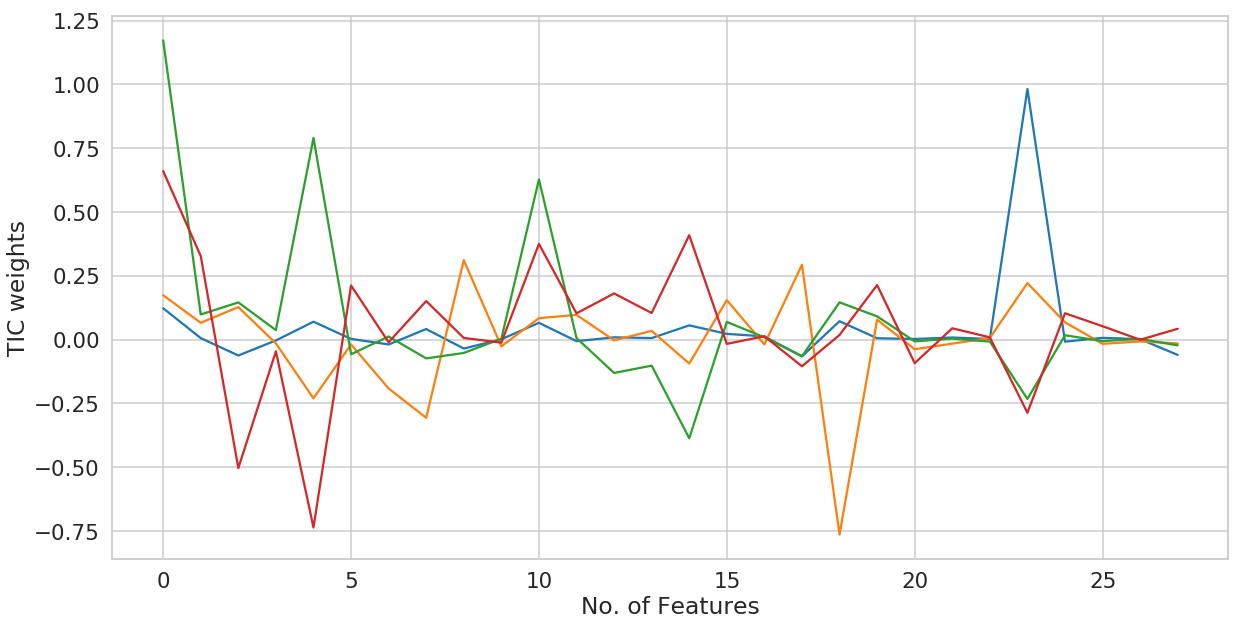

In [22]:
plot(tica_mdl.components_[0])
plot(tica_mdl.components_[1])
plot(tica_mdl.components_[2])
plot(tica_mdl.components_[3])
#plot(tica_mdl.components_[2])
ylabel('TIC weights')
xlabel('No. of Features')

Text(0.5, 0, 'No. of Features')

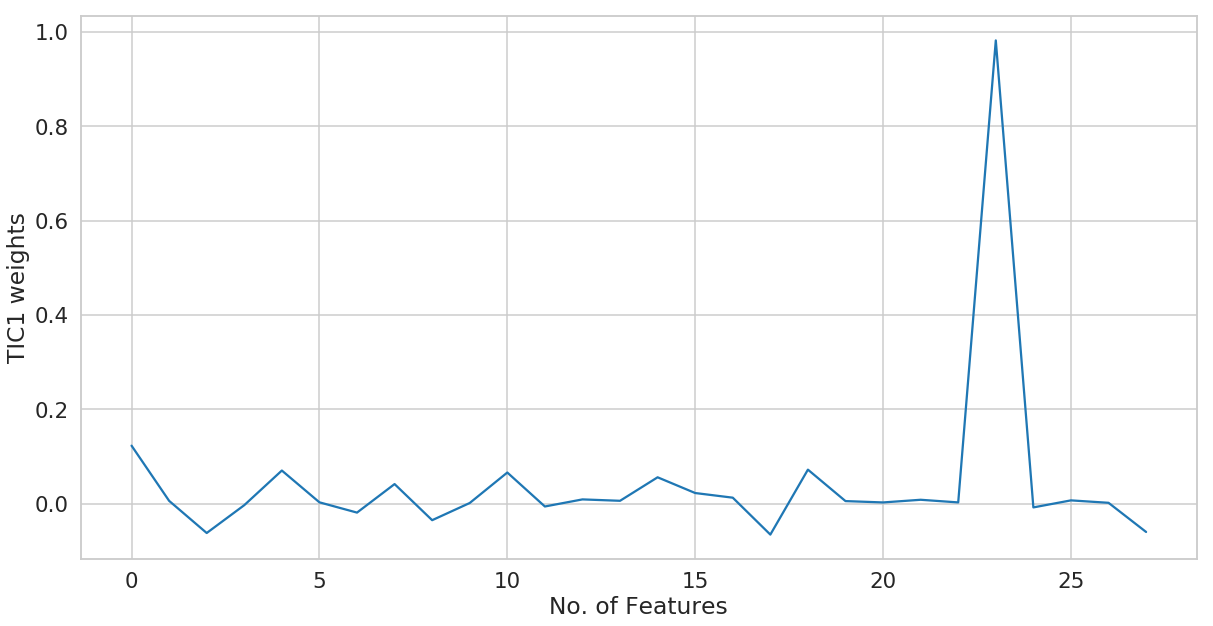

In [20]:
plot(tica_mdl.components_[0])

ylabel('TIC1 weights')
xlabel('No. of Features')

Text(0.5, 0, 'No. of Features')

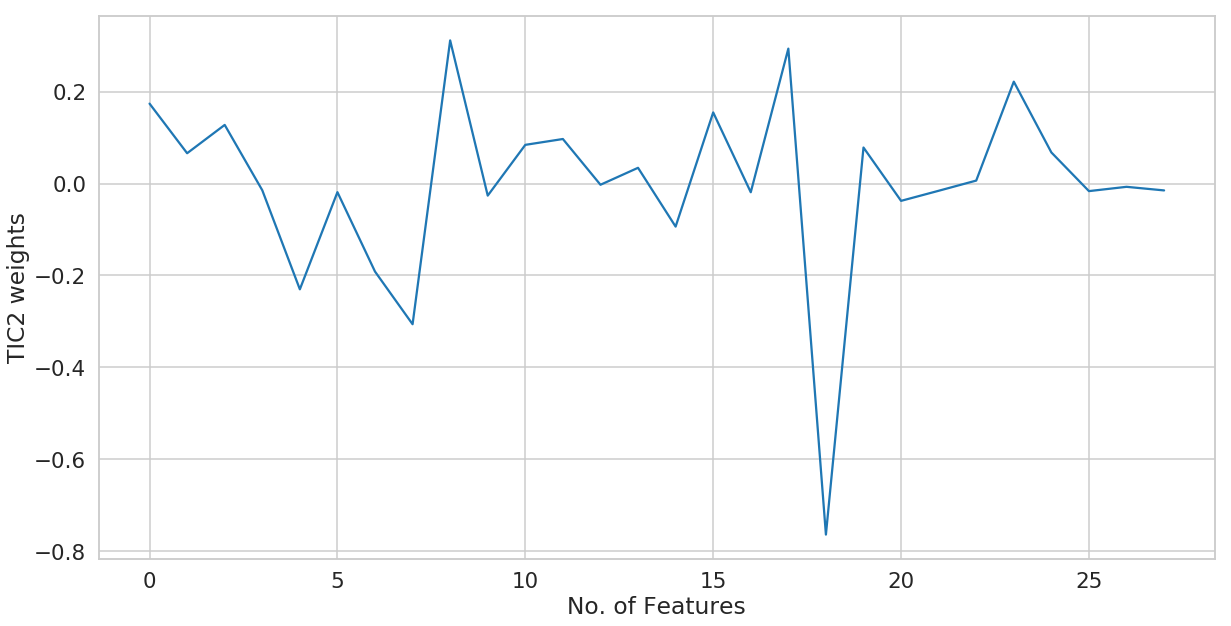

In [21]:
plot(tica_mdl.components_[1])

ylabel('TIC2 weights')
xlabel('No. of Features')

Text(0.5, 0, 'No. of Features')

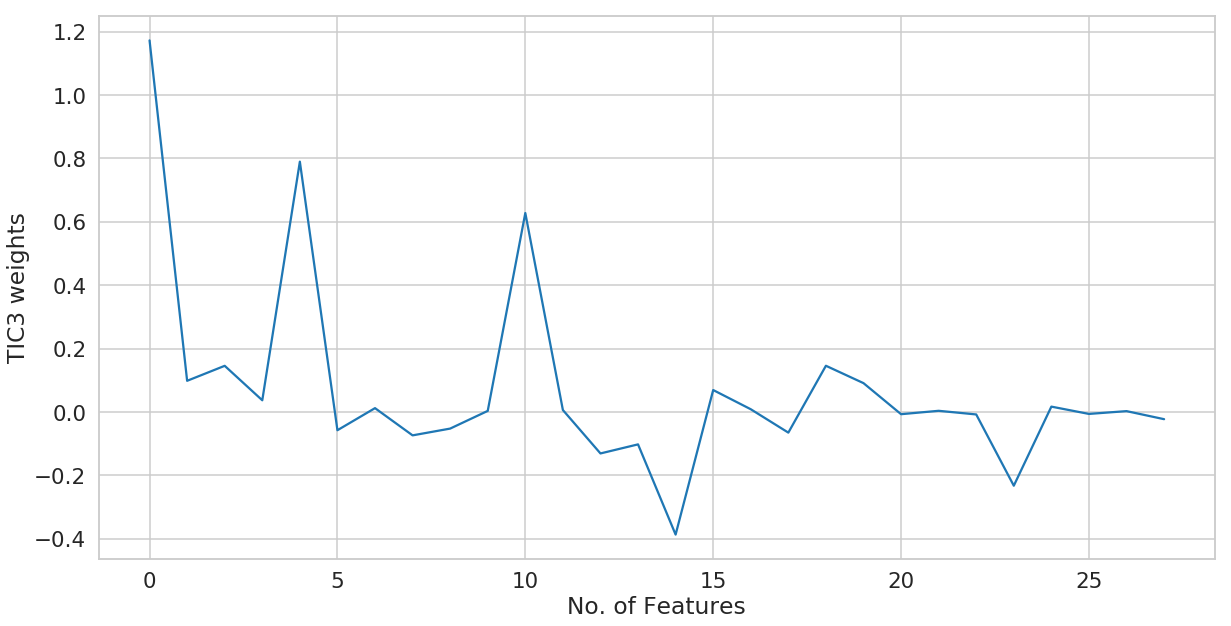

In [23]:
plot(tica_mdl.components_[2])

ylabel('TIC3 weights')
xlabel('No. of Features')

Text(0.5, 0, 'No. of Features')

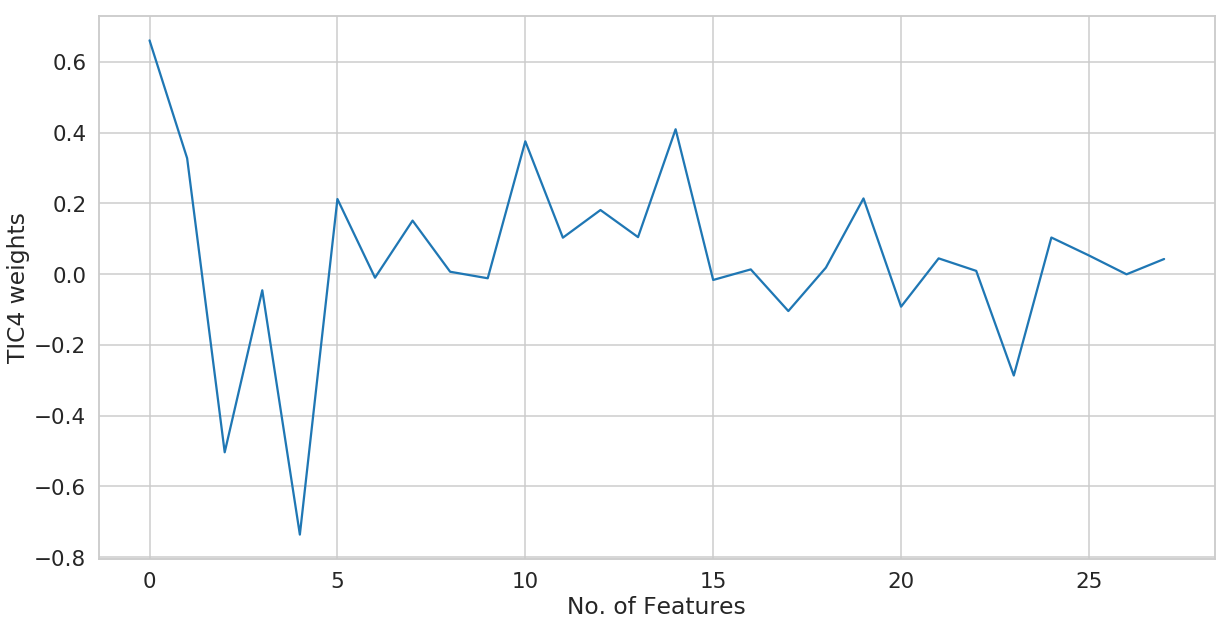

In [24]:
plot(tica_mdl.components_[3])

ylabel('TIC4 weights')
xlabel('No. of Features')

In [12]:
c=tica_mdl.timescales_

In [13]:
b=c*10

In [14]:
b

array([ 23534.44703271,   9864.28756196,   7026.71664517,   6510.08381607,
         5225.90373152])

Text(0.5, 0, 'TICs (zero indexed)')

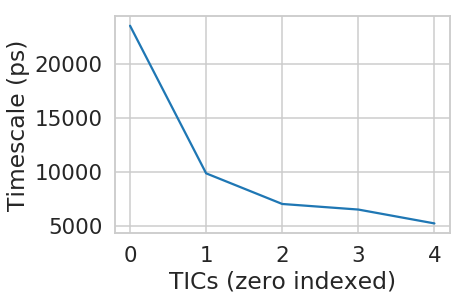

In [16]:
import matplotlib as plt
plot(b)
ylabel('Timescale (ps)')
xlabel('TICs (zero indexed)')

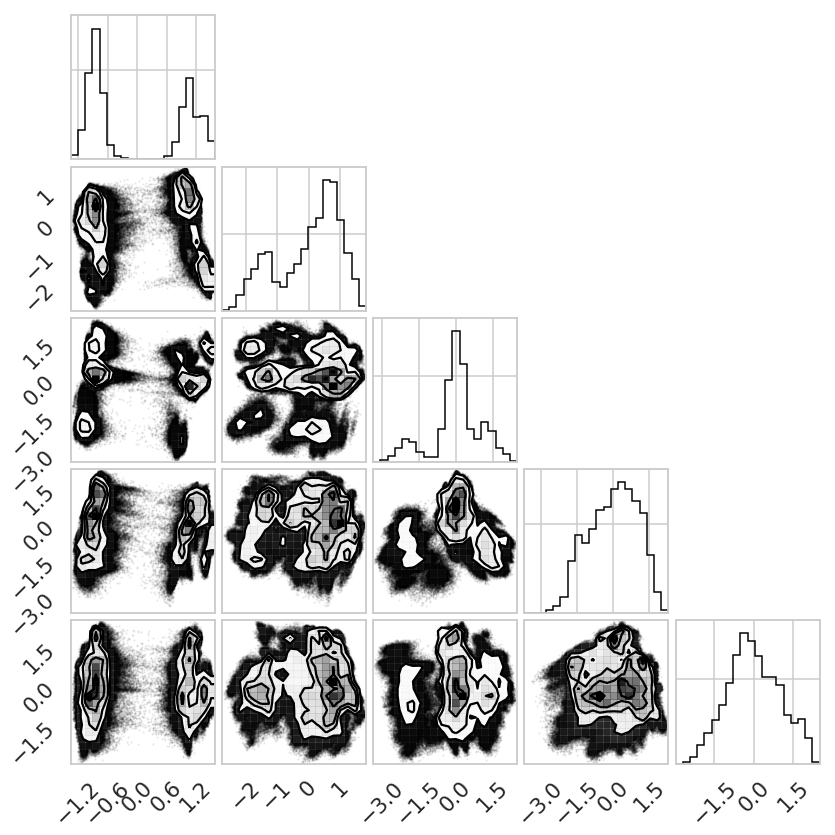

In [27]:
%matplotlib inline
import msmexplorer as msme
import numpy as np
txx = np.concatenate(tica_data)
_ = msme.plot_histogram(txx)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6cfec0d0b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6cfd310898>)

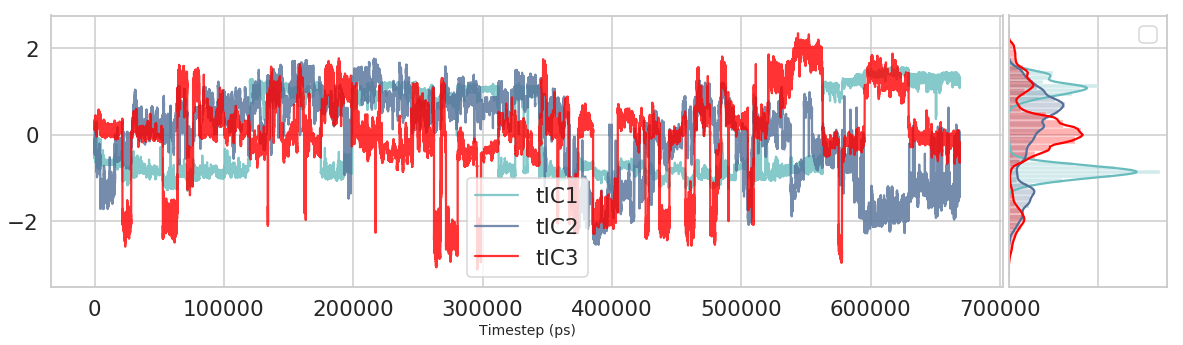

In [19]:
plt.rcParams["figure.figsize"] = (20,10)
ax, side_ax = msme.plot_trace(tica_data[0][:, 0], window=10,
                              label='tIC1', xlabel='Timestep (ps)')
_ = msme.plot_trace(tica_data[0][:, 1], window=10, label='tIC2',
                    xlabel='Timestep (ps)', color='rawdenim', ax=ax,
                    side_ax=side_ax)
msme.plot_trace(tica_data[0][:, 2], window=10, label='tIC3',
                    xlabel='Timestep (ps)', color='red', ax=ax,
                    side_ax=side_ax)

Text(0, 0.5, 'TIC 2')

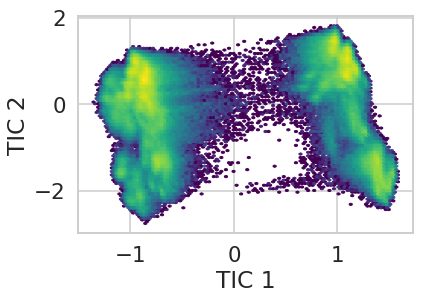

In [28]:
from matplotlib import pyplot as plt
plt.hexbin(txx[:,0], txx[:,1], bins='log', mincnt=1, cmap='viridis')
xlabel("TIC 1")
ylabel("TIC 2")

Text(0, 0.5, 'TIC 3')

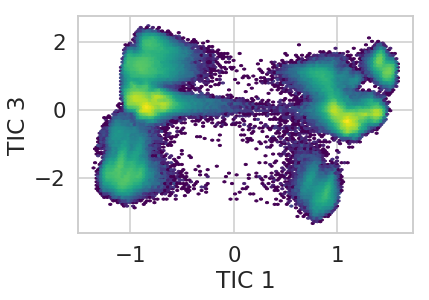

In [29]:
from matplotlib import pyplot as plt
plt.hexbin(txx[:,0], txx[:,2], bins='log', mincnt=1, cmap='viridis')
xlabel("TIC 1")
ylabel("TIC 3")

Text(0, 0.5, 'TIC 4')

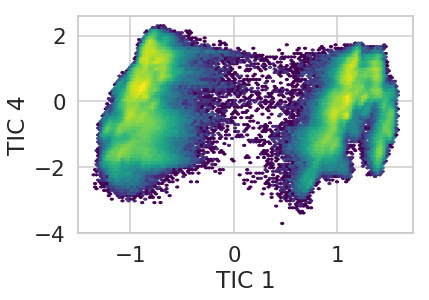

In [30]:
from matplotlib import pyplot as plt
plt.hexbin(txx[:,0], txx[:,3], bins='log', mincnt=1, cmap='viridis')
xlabel("TIC 1")
ylabel("TIC 4")

Text(0, 0.5, 'TIC 5')

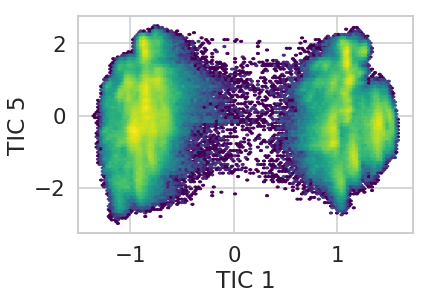

In [31]:
from matplotlib import pyplot as plt
plt.hexbin(txx[:,0], txx[:,4], bins='log', mincnt=1, cmap='viridis')
xlabel("TIC 1")
ylabel("TIC 5")

## Clustering

In [31]:
a = np.arange(1118,1276)
ds = dataset("../trajfit.xtc", topology="../prot.pdb", atom_indices=a)
feat = DihedralFeaturizer(types=['chi1', 'chi2'])
ds_dihed=ds.fit_transform_with(feat, "res_dihed/",fmt='dir-npy')

In [33]:
ncomp = 5

#define our tica model
tica_mdl = tICA(lag_time=10,n_components=ncomp, kinetic_mapping=True)
tica_features = ds_dihed.fit_transform_with(tica_mdl, out_ds = 'reg_ticas_10lt_5tics//')
verbosedump(tica_mdl,"tica_mdl_flapchi1angle.pkl")

Saving "tica_mdl_flapchi1angle.pkl"... (<class 'msmbuilder.decomposition.tica.tICA'>)


In [34]:
from msmbuilder.cluster import MiniBatchKMeans
clusterer = MiniBatchKMeans(n_clusters=200, random_state=42)
clustered_trajs = tica_features.fit_transform_with(clusterer, 'kmeans/', fmt='dir-npy')

print(tica_features[0].shape)
print(clustered_trajs[0].shape)
verbosedump(clusterer,"clusterer.pkl")
verbosedump(clustered_trajs,"clustered_trajs.pkl")

(669019, 5)
(669019,)
Saving "clusterer.pkl"... (<class 'msmbuilder.cluster.MiniBatchKMeans'>)
Saving "clustered_trajs.pkl"... (<class 'msmbuilder.dataset.NumpyDirDataset'>)


Text(0, 0.5, 'tIC 2')

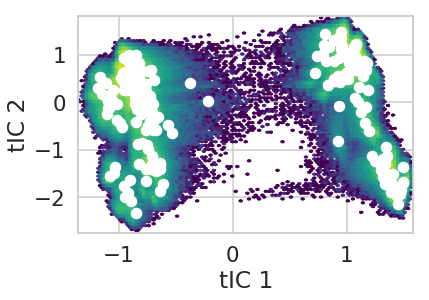

In [35]:
from matplotlib import pyplot as plt
plt.hexbin(txx[:,0], txx[:,1], bins='log', mincnt=1, cmap='viridis')
plt.scatter(clusterer.cluster_centers_[:,0], clusterer.cluster_centers_[:,1], s=100, c='w')
xlabel("tIC 1")
ylabel("tIC 2")

Text(0, 0.5, 'tIC 3')

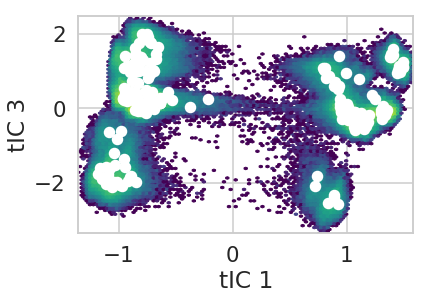

In [36]:
from matplotlib import pyplot as plt
plt.hexbin(txx[:,0], txx[:,2], bins='log', mincnt=1, cmap='viridis')
plt.scatter(clusterer.cluster_centers_[:,0], clusterer.cluster_centers_[:,2], s=100, c='w')
xlabel("tIC 1")
ylabel("tIC 3")

In [38]:
from msmbuilder.msm import MarkovStateModel

In [39]:
msm_list = [
    MarkovStateModel(lag_time=x, n_timescales=5, verbose=False)
                     for x in [1, 10, 1e2, 1e3, 5e3, 9e3]
]

for msm in msm_list:
    msm.fit(clustered_trajs)

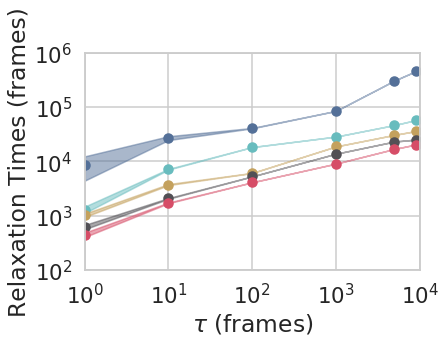

In [40]:
_ = msme.plot_implied_timescales(msm_list,
                                  xlabel=r'$\tau$ (frames)',
                                  ylabel='Relaxation Times (frames)')

In [41]:
msm = MarkovStateModel(lag_time=100, n_timescales=10)
msm.fit(clustered_trajs)

MSM contains 1 strongly connected component above weight=0.01. Component 0 selected, with population 100.000000%


MarkovStateModel(ergodic_cutoff='on', lag_time=100, n_timescales=10,
                 prior_counts=0, reversible_type='mle', sliding_window=True,
                 verbose=True)

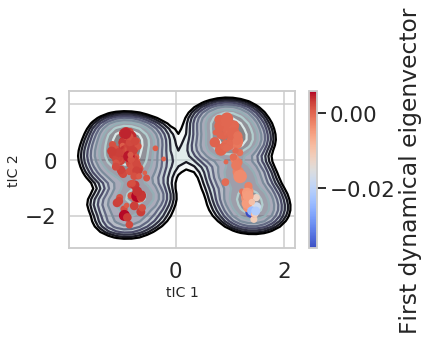

In [42]:
%matplotlib inline
assignments = clusterer.partial_transform(txx)
assignments = msm.partial_transform(assignments)
msme.plot_free_energy(txx, obs=(0, 1), n_samples=10000,
                      pi=msm.populations_[assignments],
                      xlabel='tIC 1', ylabel='tIC 2')
plt.scatter(clusterer.cluster_centers_[msm.state_labels_, 0],
            clusterer.cluster_centers_[msm.state_labels_, 1],
            s=1e4 * msm.populations_,       # size by population
            c=msm.left_eigenvectors_[:, 1], # color by eigenvector
            cmap="coolwarm",
            zorder=3) 
plt.colorbar(label='First dynamical eigenvector')
plt.tight_layout()

In [43]:
for i, (ts, ts_u) in enumerate(zip(msm.timescales_, msm.uncertainty_timescales())):
    timescale_ns = ts 
    uncertainty_ns = ts_u 
    print('Timescale %d: %.2f ± %.2f ns' % ((i + 1), timescale_ns, uncertainty_ns))

Timescale 1: 40878.73 ± 321.92 ns
Timescale 2: 18329.46 ± 43.03 ns
Timescale 3: 6123.26 ± 17.12 ns
Timescale 4: 5292.43 ± 10.08 ns
Timescale 5: 4123.63 ± 6.61 ns
Timescale 6: 3653.13 ± 8.21 ns
Timescale 7: 3312.26 ± 5.47 ns
Timescale 8: 2812.44 ± 6.23 ns
Timescale 9: 2608.96 ± 4.35 ns
Timescale 10: 2279.26 ± 7.00 ns


In [44]:
from msmbuilder.lumping import PCCAPlus
pcca = PCCAPlus.from_msm(msm, n_macrostates=4)
macro_trajs = pcca.transform(clustered_trajs)

Optimization terminated successfully.
         Current function value: -3.969511
         Iterations: 20
         Function evaluations: 140


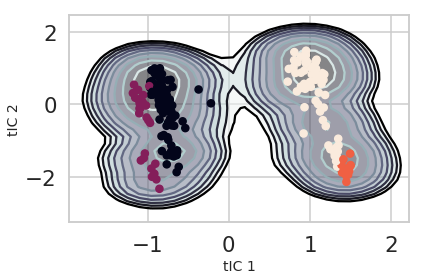

In [45]:
msme.plot_free_energy(txx, obs=(0, 1), n_samples=10000,
                      pi=msm.populations_[assignments],
                      xlabel='tIC 1', ylabel='tIC 2')
plt.scatter(clusterer.cluster_centers_[msm.state_labels_, 0],
            clusterer.cluster_centers_[msm.state_labels_, 1],
            s=50,
            c=pcca.microstate_mapping_,
            zorder=3
           )
plt.tight_layout()